In [17]:
# Datenübersicht

In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Einlesen via Pandas(pd) und einem CSV
df = pd.read_csv("data/Invistico_Airline.csv")
print("\n Top 5 Rows")
#print(df.head())  # Top 5 jeder Spalte des Datensets
print("Age")
print(df['Age'].head()) # Einschränkung für gewünschte Spalte möglich

# In einem ersten Schritt sichten wir unsere Daten, damit wir ein Gesamtbild haben und erste Richtungen für die detaillierte Analyse definieren können.
# Welche Spalte hält welchen Datentyp
print("\n Jeweiliger Datentyp pro Spalte")
print(df.dtypes)
# print(df['Age'].dtypes) # Einschränkung für gewünschte Spalte möglich

# Statistische Übersicht über numerische Spalten
print("\n Statistische Kennzahlen für den jeweiligen Parameter")
print("count: Anzahl der Nicht-NaN-Werte")
print("mean: Mittelwert")
print("std: Standardabweichung")
print("min: Minimum")
print("25%: 1. Quartil")
print("50%: Median")
print("75%: 3. Quartil")
print("max: Maximum")
#Ausführen
print(df.describe())
# print(df['Age'].describe()) # Einschränkung für gewünschte nummerische Spalte möglich

# Einzigartige Werte pro Spalte
print("\n Anzahl einzigartiger Werte pro Spalte (Unique)")
print(df.nunique())
# print(df['Age'].nunique()) # Einschränkung für gewünschte Spalte möglich

# Verteilung bestimmter wichtiger Spalten ansehen
print("\n Verteilung gewisser definierter Parameter")
print(df['Age'].value_counts().sort_index()) #Age
print(df['Gender'].value_counts().sort_index()) #Gender

# Korrelationen zwischen numerischen Variablen
# Korrelation drückt sich folgendermasse aus:
# Beispiel mit Age
# 0.80 bei Alter und Arbeitsjahre: Starker positiver Zusammenhang – je älter, desto mehr Arbeitsjahre.
# 0.65 bei Alter und Gehalt: Mäßig positiver Zusammenhang – älter = tendenziell höheres Gehalt.
print("\n Korrelationsmatrix (numerisch):")
print(df.corr(numeric_only=True)) # Korrelation aller Parameter
print(df[["Flight Distance", "Seat comfort", "Food and drink"]].corr(numeric_only=True)) # Korrelation spezifischer Parameter
print(df[["Checkin service", "Online boarding", "Departure Delay in Minutes"]].corr(numeric_only=True)) # Korrelation spezifischer Parameter

# Verhältnis von Zufriedenheit zu anderen Merkmalen (Beispiel)
print("\n Zufriedenheit nach Geschlecht")
print(df.groupby('Gender')['satisfaction'].value_counts(normalize=True))

# Duplikate prüfen von Datensatz
print("\n Anzahl Duplikate")
print(df.duplicated().sum())


 Top 5 Rows
Age
0    65
1    47
2    15
3    60
4    70
Name: Age, dtype: int64

 Jeweiliger Datentyp pro Spalte
satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                    

In [20]:
# 2. 🧼 Datenanalyse
print("\n🧱 Spalten:", df.columns.tolist())
print("\n❓ Fehlende Werte pro Spalte:")
print(df.isnull().sum())

print("\n📊 Zufriedenheit (Target-Verteilung):")
print(df['satisfaction'].value_counts())


🧱 Spalten: ['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

❓ Fehlende Werte pro Spalte:
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entert

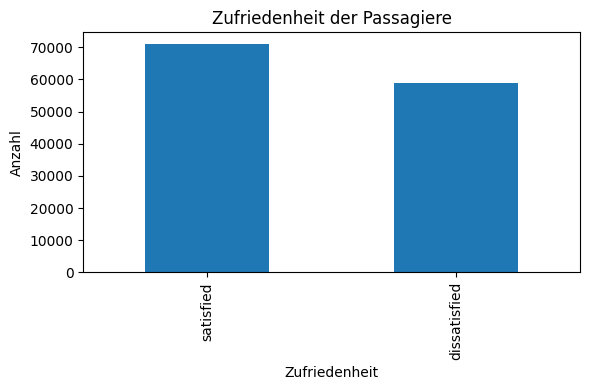

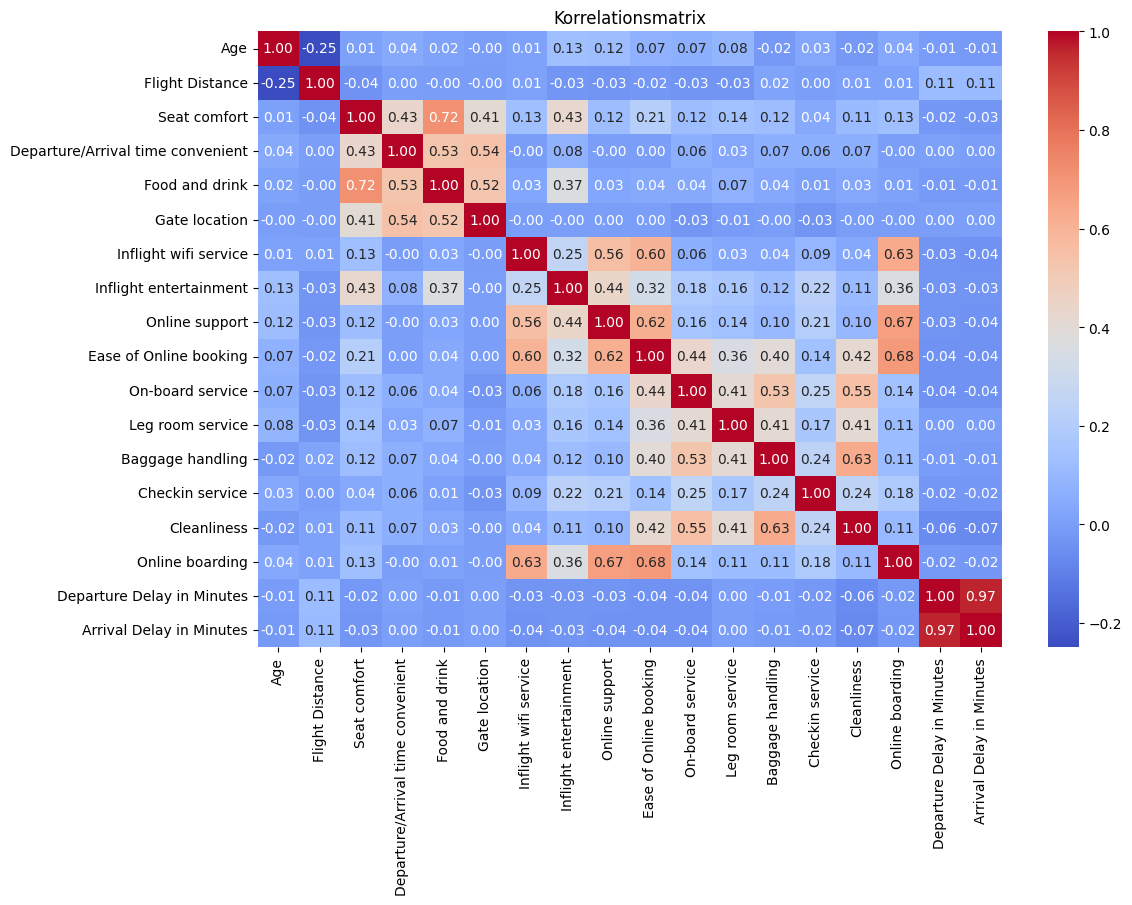

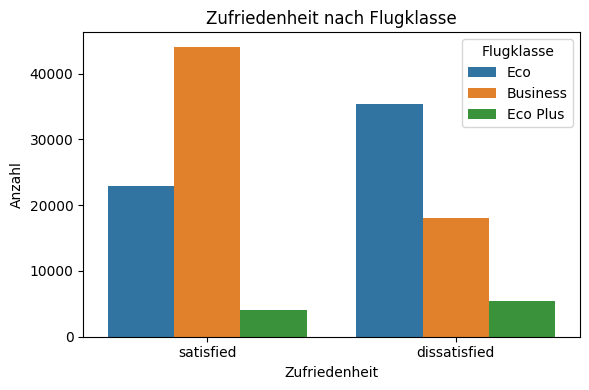

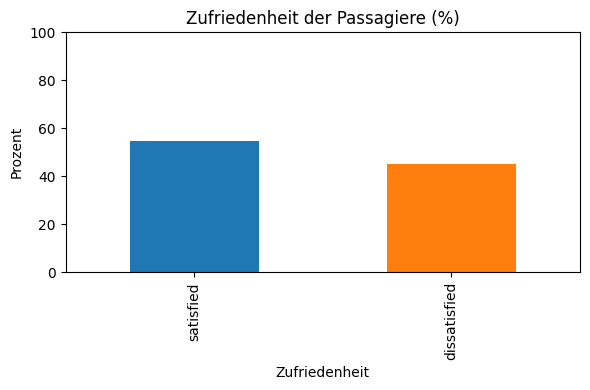

KeyError: 'Satisfaction'

In [21]:
# 3. 📈 Visualisierung
plt.figure(figsize=(6,4))
df['satisfaction'].value_counts().plot(kind='bar')
plt.title("Zufriedenheit der Passagiere")
plt.xlabel("Zufriedenheit")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

# Heatmap der numerischen Korrelationen
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='satisfaction', hue='Class')  # Oder z. B. 'gender', 'customer_type', etc.
plt.title("Zufriedenheit nach Flugklasse")
plt.xlabel("Zufriedenheit")
plt.ylabel("Anzahl")
plt.legend(title='Flugklasse')
plt.tight_layout()
plt.show()

satisfaction_pct = df['satisfaction'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
satisfaction_pct.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title("Zufriedenheit der Passagiere (%)")
plt.xlabel("Zufriedenheit")
plt.ylabel("Prozent")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Nur numerische Features mit Korrelation zur Zufriedenheit (nur absolute Werte > 0.1 anzeigen)
corr_matrix = df.select_dtypes(include='number').corr()
satisfaction_corr = corr_matrix['Satisfaction'].drop('satisfaction')
satisfaction_corr = satisfaction_corr[abs(satisfaction_corr) > 0.1].sort_values()

plt.figure(figsize=(6, 4))
satisfaction_corr.plot(kind='barh', color='teal')
plt.title("Korrelation mit Zufriedenheit (|r| > 0.1)")
plt.xlabel("Korrelationskoeffizient")
plt.tight_layout()
plt.show()

top_corr_features = satisfaction_corr.abs().sort_values(ascending=False).head(5).index.tolist()
selected_features = top_corr_features + ['satisfaction']

plt.figure(figsize=(6, 4))
sns.heatmap(df[selected_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Top-Korrelationen mit Zufriedenheit")
plt.tight_layout()
plt.show()
print(corr_matrix.columns.tolist())

In [ ]:
# 4. 🧠 Machine Learning

# Vorbereitung: Nur numerische + sinnvoll gewandelte Features nutzen
# Beispiel: einfache Vorverarbeitung
from sklearn.preprocessing import LabelEncoder

# Kopie des Datensatzes
X = df.copy()

# Zielvariable encodieren
y = LabelEncoder().fit_transform(X['satisfaction'])
X = X.drop(columns=['satisfaction'])

# Kategorische Features codieren
X = pd.get_dummies(X, drop_first=True)

# ❗ Sofortlösung: Fehlende Werte entfernen
X = X.dropna()
y = y[X.index] 

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Klassifikator trainieren
model = LogisticRegression(max_iter=15000)
model.fit(X_train, y_train)

# Vorhersage & Bewertung
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.8350451772337633

📉 Confusion Matrix:
[[ 9652  2169]
 [ 2103 11974]]

📝 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11821
           1       0.85      0.85      0.85     14077

    accuracy                           0.84     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.84      0.84     25898



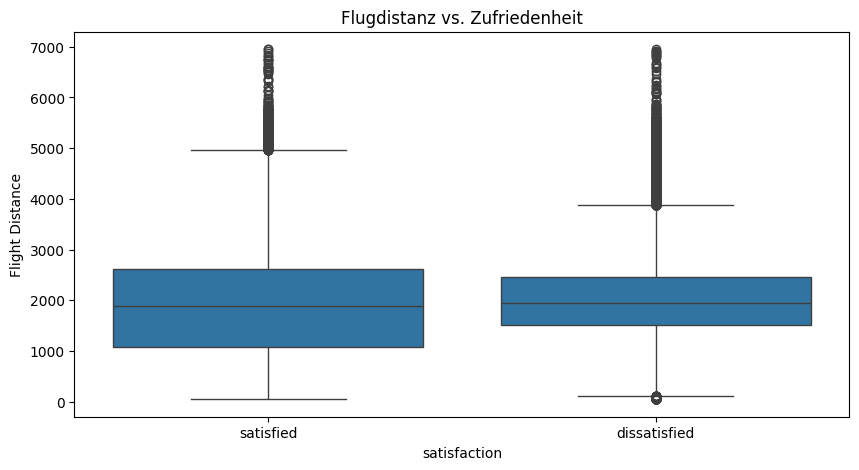

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x="satisfaction", y="Flight Distance", data=df)
plt.title("Flugdistanz vs. Zufriedenheit")
plt.show()

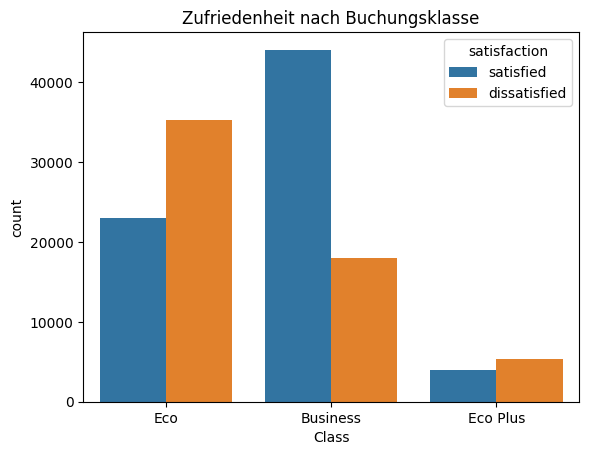

In [ ]:
sns.countplot(data=df, x="Class", hue="satisfaction")
plt.title("Zufriedenheit nach Buchungsklasse")
plt.show()

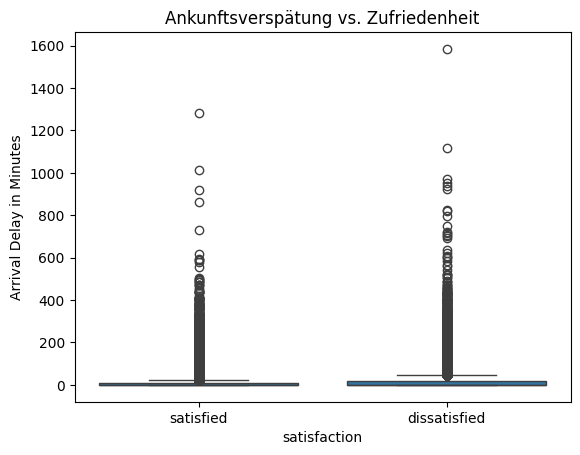

In [ ]:
sns.boxplot(data=df, x="satisfaction", y="Arrival Delay in Minutes")
plt.title("Ankunftsverspätung vs. Zufriedenheit")
plt.show()

In [ ]:
neuer_passagier = pd.DataFrame({
    'Gender': ['Male'],
    'Customer Type': ['Loyal Customer'],
    'Age': [45],
    'Type of Travel': ['Business travel'],
    'Class': ['Business'],
    'Flight Distance': [750],
    'Inflight wifi service': [4],
    'Departure Delay in Minutes': [0],
    'Arrival Delay in Minutes': [5],
    # ... alle anderen Features hier ergänzen ...
})

# Umwandeln wie Trainingsdaten
neuer_passagier_encoded = pd.get_dummies(neuer_passagier)
# Fehlende Spalten auffüllen (die im Modell vorhanden waren)
neuer_passagier_encoded = neuer_passagier_encoded.reindex(columns=X.columns, fill_value=0)

# Vorhersage
vorhersage = model.predict(neuer_passagier_encoded)
print("Vorhersage für hypothetischen Passagier:", "Zufrieden" if vorhersage[0] == 1 else "Unzufrieden")


Vorhersage für hypothetischen Passagier: Unzufrieden


In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Kurve")
plt.legend()
plt.show()

NameError: name 'model' is not defined